## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [1]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [2]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [4]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOG", "FB"]
start_date = "2019-01-01"
end_date = "2019-07-01"
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [5]:
stock_data

Attributes        High                                                    \
Symbols           AAPL         AMZN          FB         GOOG        MSFT   
Date                                                                       
2019-01-02  158.850006  1553.359985  137.509995  1052.319946  101.750000   
2019-01-03  145.720001  1538.000000  137.169998  1056.979980  100.190002   
2019-01-04  148.550003  1594.000000  138.000000  1070.839966  102.510002   
2019-01-07  148.830002  1634.560059  138.869995  1074.000000  103.269997   
2019-01-08  151.820007  1676.609985  143.139999  1084.560059  103.970001   
2019-01-09  154.529999  1667.800049  144.699997  1082.630005  104.879997   
2019-01-10  153.970001  1663.250000  144.559998  1071.150024  103.750000   
2019-01-11  153.699997  1660.290039  145.360001  1063.775024  103.440002   
2019-01-14  151.270004  1648.199951  146.570007  1051.530029  102.870003   
2019-01-15  153.389999  1675.160034  150.679993  1080.050049  105.050003   
2019-01-16  155.880005  1705.000000  149.649994  1092.375000  106.260002   
2019-01-17  157.660004  1700.170044  149.000000  1091.800049  106.629997   
2019-01-18  157.880005  1716.199951  152.429993  1108.352051  107.900002   
2019-01-22  156.729996  1681.869995  151.529999  1091.510010  107.099998   
2019-01-23  155.139999  1657.430054  148.800003  1084.930054  107.040001   
2019-01-24  154.479996  1657.260010  146.440002  1079.474976  107.000000   
2019-01-25  158.130005  1683.479980  149.830002  1094.000000  107.879997   
2019-01-28  156.330002  1645.000000  148.960007  1083.000000  106.480003   
2019-01-29  158.130005  1632.380005  148.100006  1075.150024  104.970001   
2019-01-30  166.149994  1676.949951  150.949997  1091.000000  106.379997   
2019-01-31  169.000000  1736.410034  171.679993  1117.329956  105.220001   
2019-02-01  168.979996  1673.060059  169.100006  1125.000000  104.099998   
2019-02-04  171.660004  1649.630005  169.300003  1132.800049  105.800003   
2019-02-05  175.080002  1665.260010  171.979996  1146.849976  107.269997   
2019-02-06  175.570007  1672.260010  172.470001  1147.000000  107.000000   
2019-02-07  173.940002  1625.540039  169.240005  1104.839966  105.589996   
2019-02-08  170.660004  1588.589966  167.369995  1098.910034  105.779999   
2019-02-11  171.210007  1609.290039  168.300003  1105.944946  106.580002   
2019-02-12  171.000000  1639.400024  168.339996  1125.295044  107.139999   
2019-02-13  172.479996  1656.380005  166.220001  1134.729980  107.779999   
...                ...          ...         ...          ...         ...   
2019-05-21  188.000000  1879.000000  185.699997  1152.708008  127.529999   
2019-05-22  185.710007  1871.489990  186.740005  1158.520020  128.240005   
2019-05-23  180.539993  1844.000000  183.899994  1145.973022  126.290001   
2019-05-24  182.139999  1841.760010  183.630005  1149.765015  127.419998   
2019-05-28  180.589996  1849.270020  184.710007  1151.587036  128.000000   
2019-05-29  179.350006  1830.000000  184.559998  1129.099976  125.389999   
2019-05-30  179.229996  1829.469971  183.479996  1123.130005  125.760002   
2019-05-31  177.990005  1795.589966  180.539993  1109.599976  124.620003   
2019-06-03  177.919998  1766.290039  175.050003  1065.500000  124.370003   
2019-06-04  179.830002  1730.819946  168.279999  1056.050049  123.279999   
2019-06-05  184.990005  1752.000000  168.720001  1053.550049  125.870003   
2019-06-06  185.470001  1760.000000  169.699997  1047.489990  127.970001   
2019-06-07  191.919998  1806.250000  173.869995  1070.920044  132.250000   
2019-06-10  195.369995  1884.869995  177.860001  1092.660034  134.080002   
2019-06-11  196.000000  1893.699951  179.979996  1101.989990  134.240005   
2019-06-12  195.970001  1865.000000  179.270004  1080.930054  131.970001   
2019-06-13  196.789993  1883.089966  178.029999  1094.170044  133.000000   
2019-06-14  193.589996  1876.000000  181.839996  1092.689941  133.789993   
2019-06-17  194.960007  1895.689941  189.500000 

In [6]:
stock_data['Adj Close']

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Date,,,,,
2019-01-02,156.049484,1539.130005,135.679993,1045.849976,99.985695
2019-01-03,140.505798,1500.280029,131.740005,1016.059998,96.307419
2019-01-04,146.503891,1575.390015,137.949997,1070.709961,100.786606
2019-01-07,146.177811,1629.510010,138.050003,1068.390015,100.915146
2019-01-08,148.964386,1656.579956,142.529999,1076.280029,101.646843
2019-01-09,151.494064,1659.420044,144.229996,1074.660034,103.100357
2019-01-10,151.978271,1656.219971,144.199997,1070.329956,102.437866
2019-01-11,150.486160,1640.560059,143.800003,1057.189941,101.646843
2019-01-14,148.223282,1617.209961,145.389999,1044.689941,100.905266


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

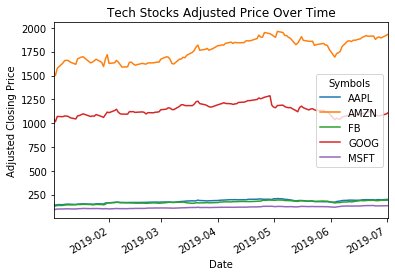

In [7]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

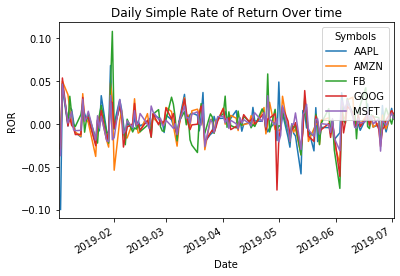

<Figure size 1152x648 with 0 Axes>

In [8]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

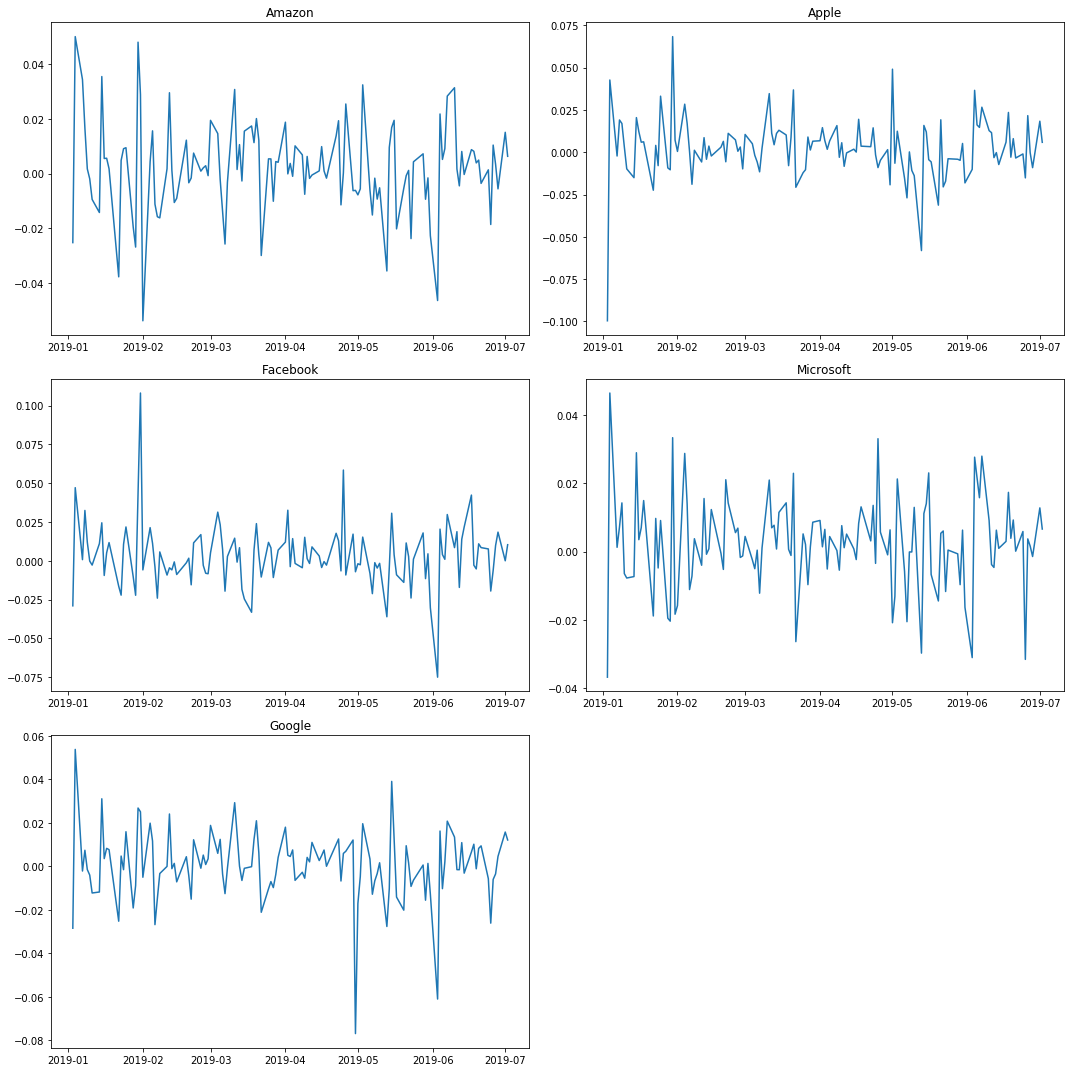

In [9]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['FB'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [10]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

Symbols
AAPL    0.002237
AMZN    0.001968
FB      0.003104
GOOG    0.000614
MSFT    0.002565
dtype: float64

In [11]:
# daily mean index for the x axis
daily_mean.keys()

Index(['AAPL', 'AMZN', 'FB', 'GOOG', 'MSFT'], dtype='object', name='Symbols')

In [12]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.002237172033312513,
 0.0019680201199644928,
 0.0031043625377323984,
 0.0006142877425876146,
 0.0025651715745925864]

In [13]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

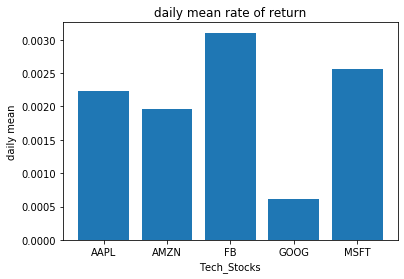

In [14]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [15]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

Symbols
AAPL    0.000342
AMZN    0.000278
FB      0.000406
GOOG    0.000257
MSFT    0.000189
dtype: float64

In [16]:
# variance index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'FB', 'GOOG', 'MSFT'], dtype='object', name='Symbols')

In [17]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.00034238222321335146,
 0.00027817472503609205,
 0.0004055572931225216,
 0.00025717200302780566,
 0.000189106014425315]

In [18]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

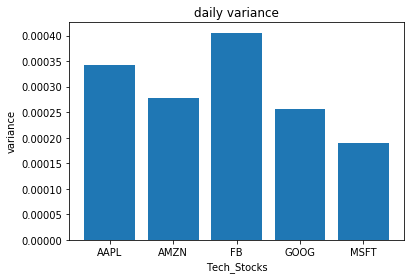

In [19]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [20]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

Symbols
AAPL    0.018504
AMZN    0.016679
FB      0.020138
GOOG    0.016037
MSFT    0.013752
dtype: float64

In [21]:
# standard deviation index for the x axis
daily_var.keys()

Index(['AAPL', 'AMZN', 'FB', 'GOOG', 'MSFT'], dtype='object', name='Symbols')

In [22]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.018503573255275626,
 0.016678570833140713,
 0.020138453096564334,
 0.016036583271626336,
 0.01375158225170162]

In [23]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

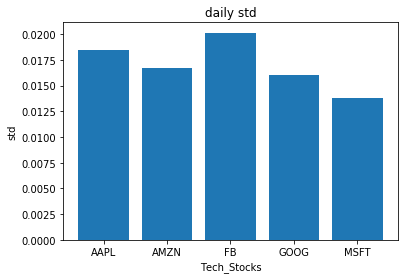

In [24]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [25]:
stock_data_daily_returns.corr()

Symbols,AAPL,AMZN,FB,GOOG,MSFT
Symbols,,,,,
AAPL,1.000000,0.610261,0.439034,0.569632,0.653080
AMZN,0.610261,1.000000,0.572375,0.721313,0.731656
FB,0.439034,0.572375,1.000000,0.633882,0.454560
GOOG,0.569632,0.721313,0.633882,1.000000,0.637153
MSFT,0.653080,0.731656,0.454560,0.637153,1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.